In [296]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import pylab as py
from skimage import data
from skimage import filters
from skimage import exposure
from PIL import Image
import matplotlib.image

t = [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98]
 s = [ 0.       0.95106  0.58779 -0.58779 -0.95106 -0.       0.95106  0.58779
 -0.58779 -0.95106 -0.       0.95106  0.58779 -0.58779 -0.95106 -0.
  0.95106  0.58779 -0.58779 -0.95106 -0.       0.95106  0.58779 -0.58779
 -0.95106 -0.       0.95106  0.58779 -0.58779 -0.95106 -0.       0.95106
  0.58779 -0.58779 -0.95106  0.       0.95106  0.58779 -0.58779 -0.95106
 -0.       0.95106  0.58779 -0.58779 -0.95106 -0.       0.95106  0.58779
 -0.58779 -0.95106]


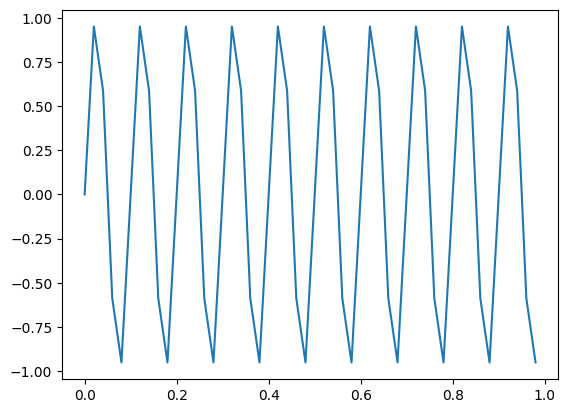

In [297]:
# zadanie 2.1 - 2.2
def sinus(f, Fs):
    t = np.arange(0, 1, 1 / Fs)
    s = np.sin(2*np.pi*f*t)
    return t, s
f = 10
Fs = 50
t, s = sinus(f, Fs)
print(f"t = {np.round(t, 5)}\n s = {np.round(s, 5)}")
plt.plot(t, s)

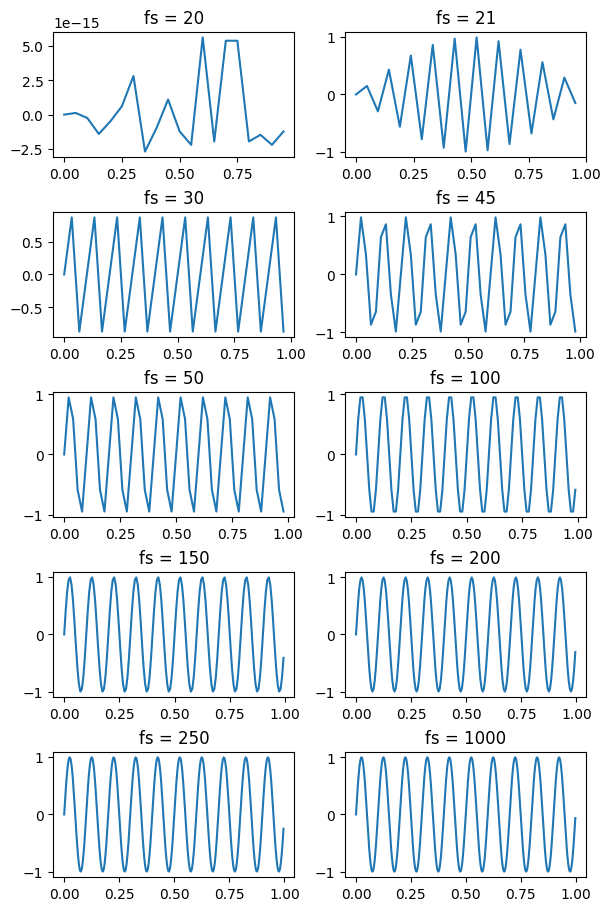

In [298]:
# zadanie 2.3
def sinus(f, Fs):
    t = np.arange(0, 1, 1 / Fs)
    s = np.sin(2*np.pi*f*t)
    return s, t
f = 10
Fs = [20, 21, 30, 45, 50, 100, 150, 200, 250, 1000]
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(6, 9), constrained_layout = True)
for i in range(0, 5):
    for j in range(0, 2):            
        t, s = sinus(f, Fs[i*2+j])
        axs[i][j].plot(s, t)
        axs[i][j].set_title(f"fs = {Fs[i*2+j]}")
plt.show()

In [299]:
# zadanie 2.4
# Nyquist–Shannon sampling theorem
# Częstotliwość próbkowania musi być co najmniej dwukrotnie wyższa niż maksymalna częstotliwość badanego sygnału

In [300]:
# zadanie 2.5
# aliasing
# nakładanie się składowych częstotliwości, które wynika z powodu zbyt niskiej częstotliwości próbkowania

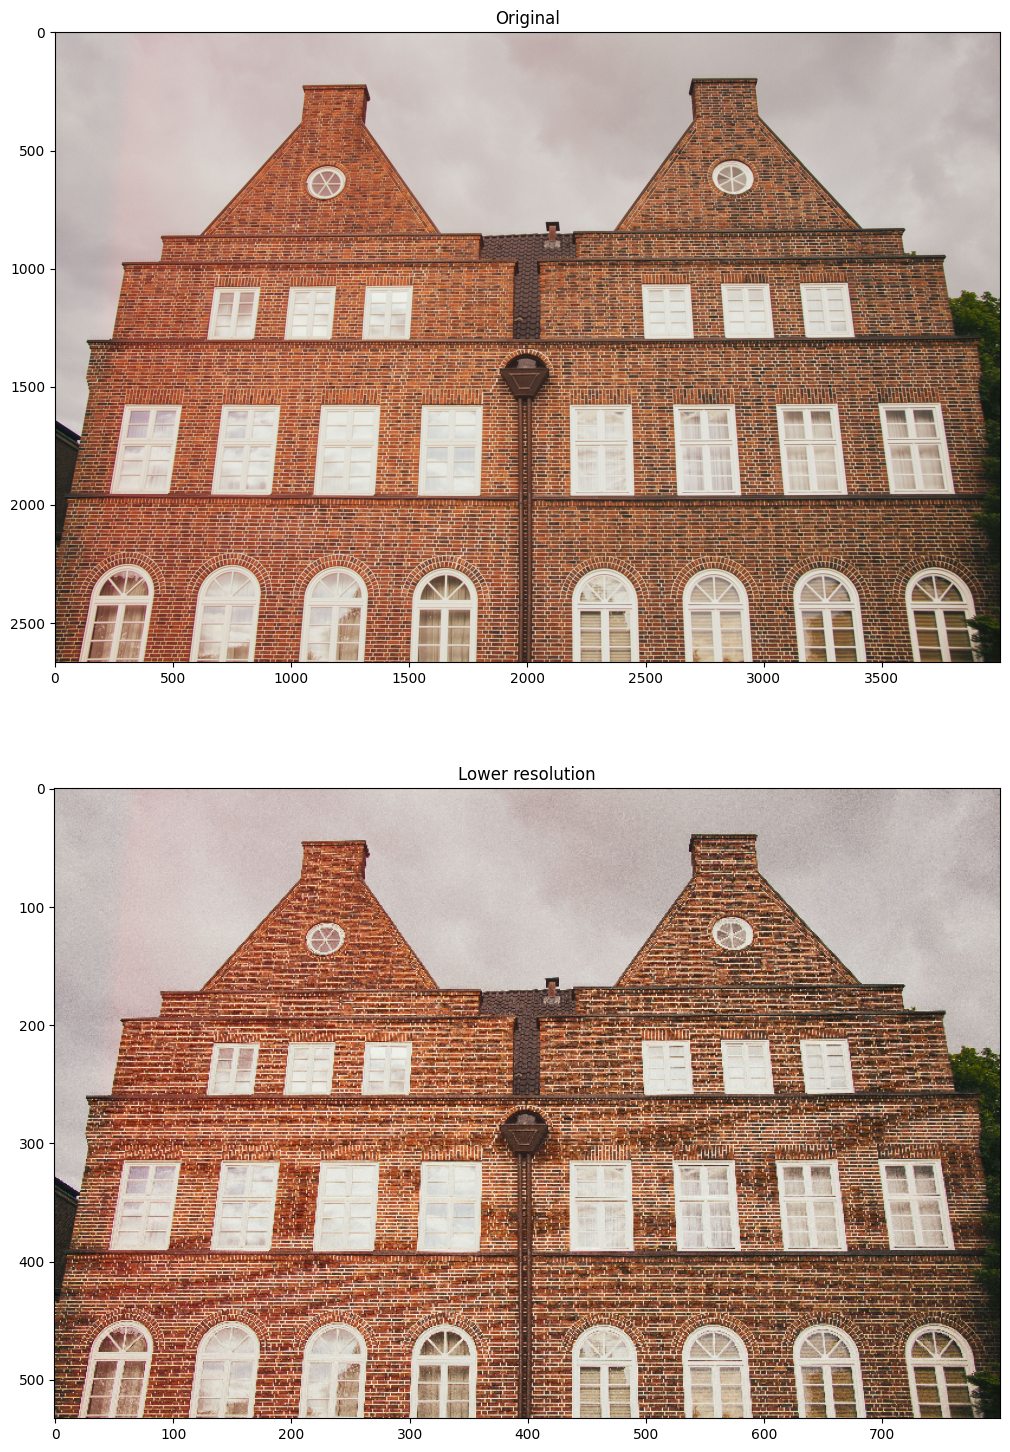

In [301]:
# zadanie 2.6
im = Image.open('lab4_23.png')
im_arr = np.array(im)
resampled = im.resize((im.width // 5, im.height // 5), Image.NEAREST)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 18))
ax1.imshow(im)
ax1.set_title('Original')
ax2.imshow(resampled)
ax2.set_title('Lower resolution')
plt.show()

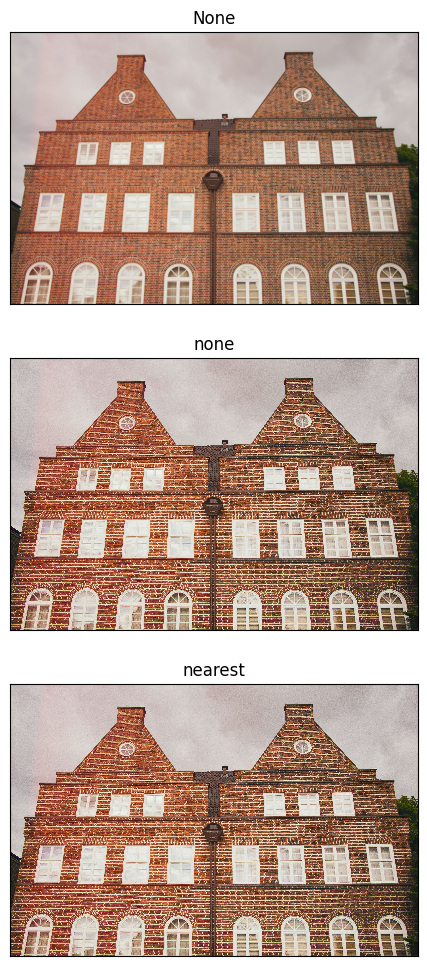

In [302]:
# zadanie 2.7
# methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#            'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#            'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
methods = [None, 'none', 'nearest']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 12),
                        subplot_kw={'xticks': [], 'yticks': []})
for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method))

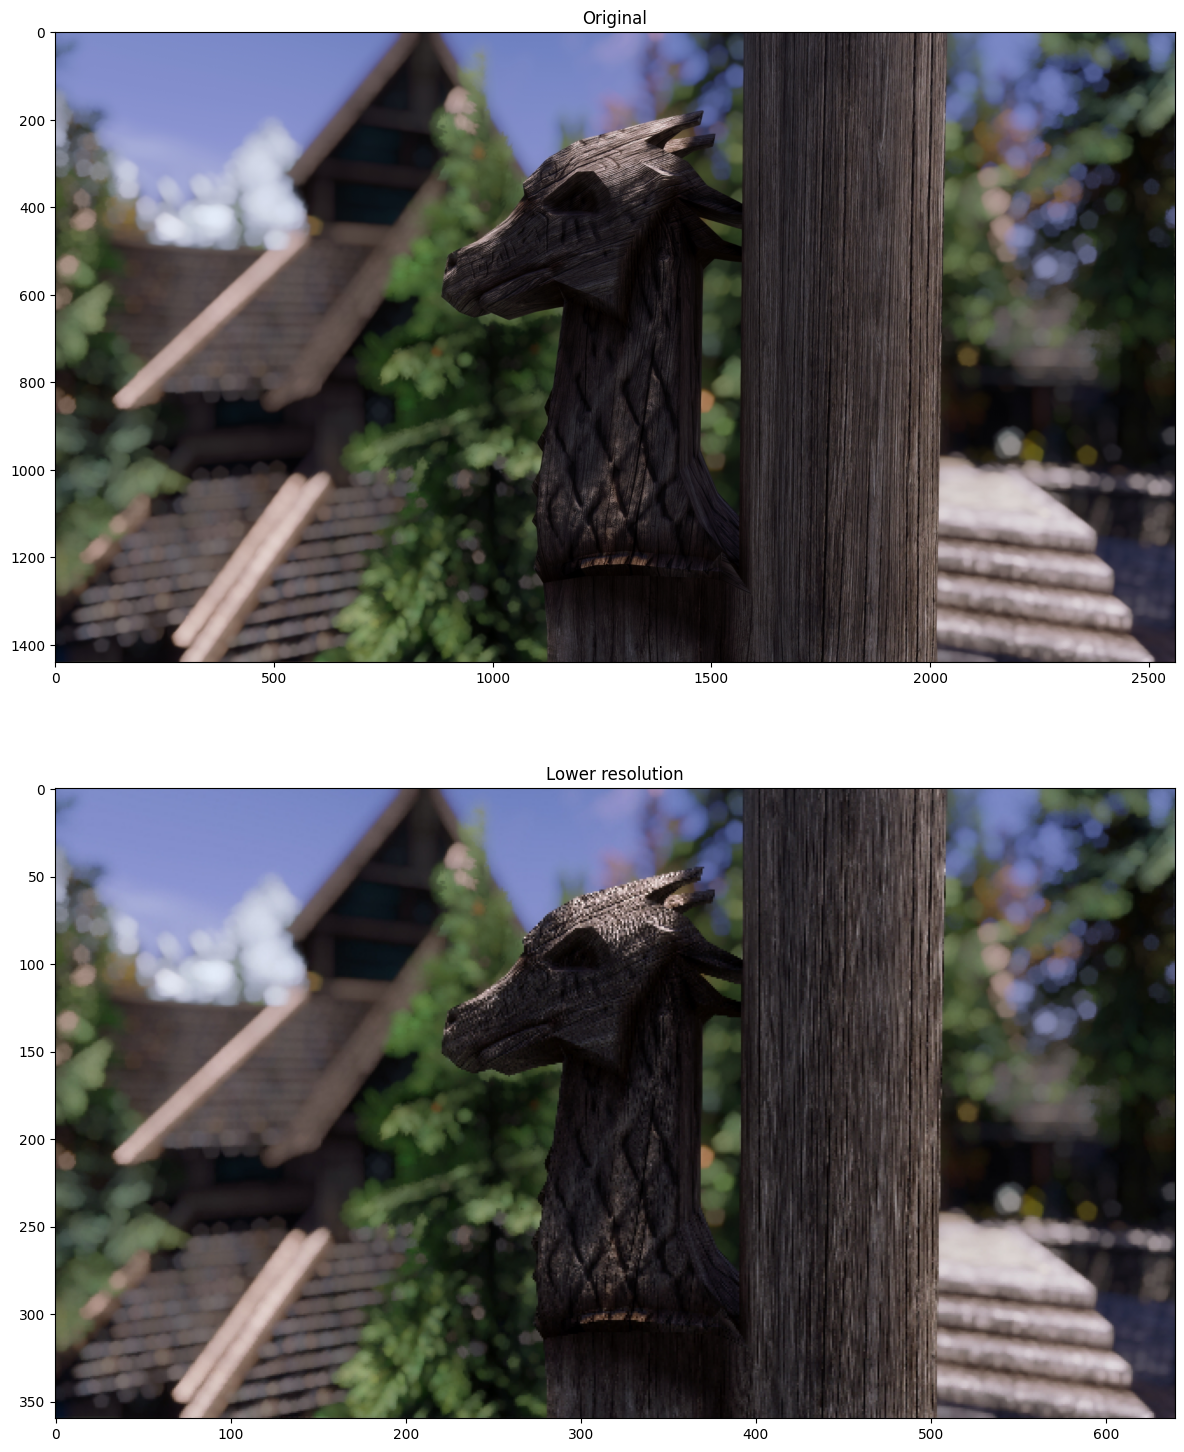

In [303]:
# zadanie 2.6
im = Image.open('lab4_234.png')
resampled = im.resize((im.width // 4, im.height // 4), Image.NEAREST)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 18))
ax1.imshow(im)
ax1.set_title('Original')
ax2.imshow(resampled)
ax2.set_title('Lower resolution')
plt.show()

In [304]:
# zadanie 3.2
im_arr.ndim # macierz ma trzy wymiary: wysokosc, szyrokosc i kanal kolorow

3

In [305]:
# zadanie 3.3
im_arr.shape[2] # kanal kolorow ma 3 wartosci, tzn kazdy pixel jest opisywany 3 wartosciami

3

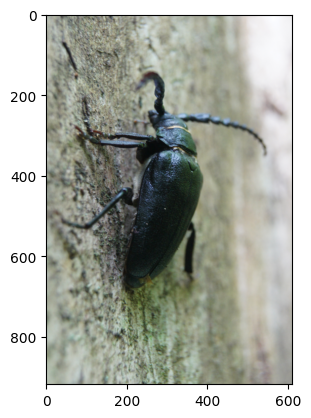

In [306]:
# zadanie 3.4
im = Image.open('lab4_3.png')
im_arr = np.array(im)
plt.imshow(im)
brightness = (np.max(im_arr, axis=-1) + np.min(im_arr, axis=-1)) / 2
mean_val = np.mean(im_arr, axis=-1)
luminance = 0.21 * im_arr[:, :, 0] + 0.72 * im_arr[:, :, 1] + 0.07 * im_arr[:, :, 2]
# brightness, mean_val, luminance

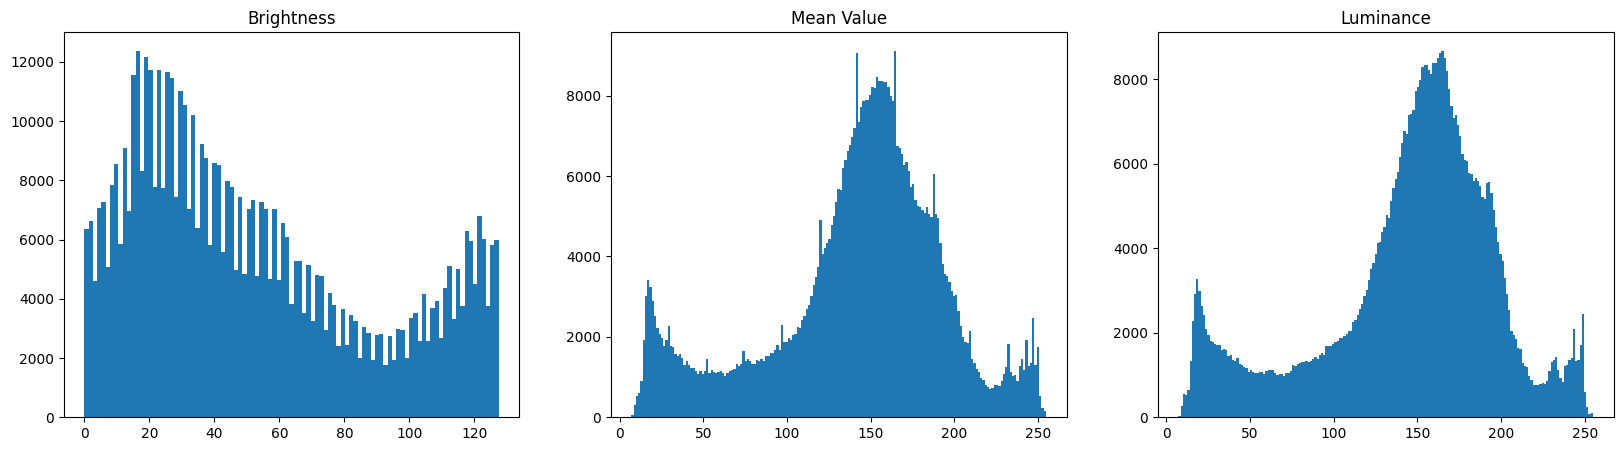

In [307]:
# zadanie 3.5
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
ax1.hist(brightness.ravel(), bins='auto')
ax1.set_title('Brightness')
ax2.hist(mean_val.ravel(), bins='auto')
ax2.set_title('Mean Value')
ax3.hist(luminance.ravel(), bins='auto')
ax3.set_title('Luminance')
plt.show()

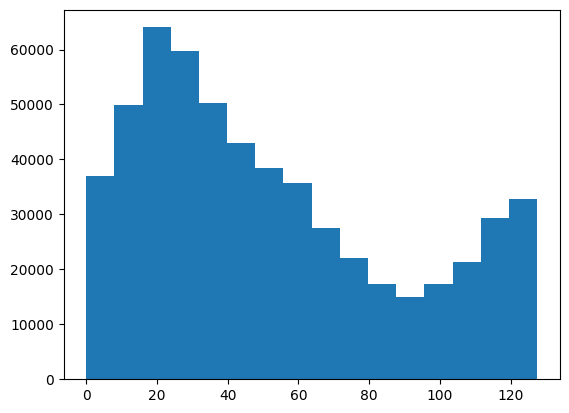

In [308]:
# zadanie 3.6
plt.hist(brightness.ravel(), bins=16)
plt.show()

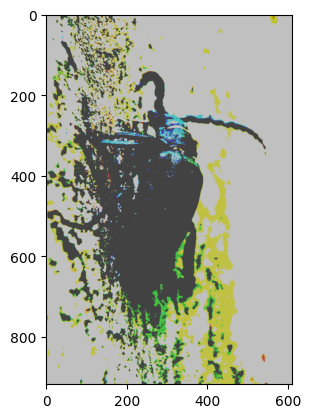

In [309]:
# zad 3.7
hist, bin_edges = np.histogram(im_arr.ravel(), bins=2)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
reduced_colors = np.zeros_like(im_arr)
for i in range(len(bin_centers)):
    mask = (im_arr >= bin_edges[i]) & (im_arr < bin_edges[i+1])
    reduced_colors[mask] = bin_centers[i]
new_im = Image.fromarray(reduced_colors.astype('uint8'))

plt.imshow(new_im)
plt.show()
new_im.save('reduced_color_image.png')

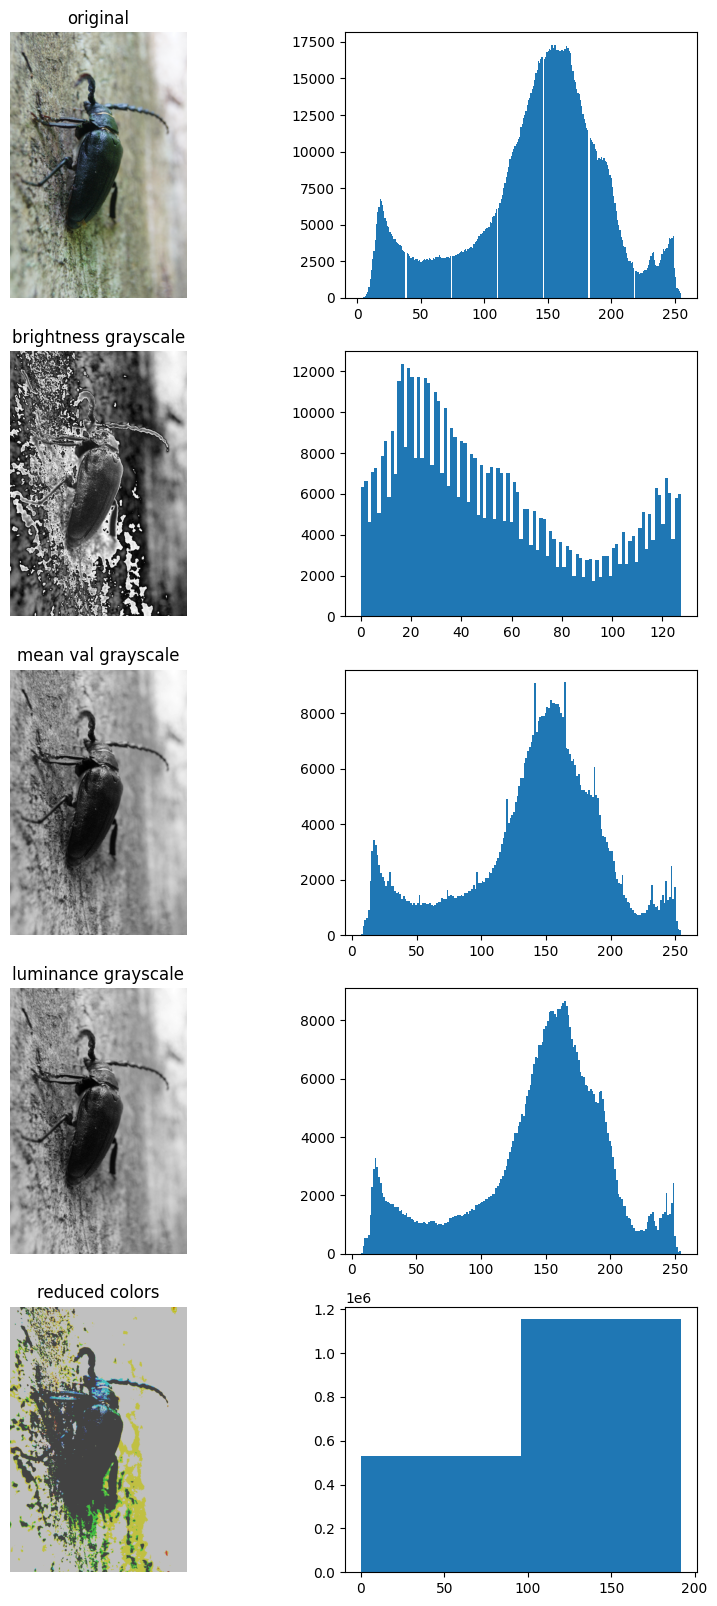

In [310]:
# zad 3.8
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
titles = ['original', 'brightness grayscale', 'mean val grayscale', 'luminance grayscale', 'reduced colors']
for i in range(5):
    axes[i, 0].set_axis_off()
    axes[i, 0].set_title(titles[i])

brightness_im = Image.fromarray(brightness.astype('uint8'))
mean_val_im = Image.fromarray(mean_val.astype('uint8'))
luminance_im = Image.fromarray(luminance.astype('uint8'))

axes[0][0].imshow(im)
axes[0][1].hist(im_arr.ravel(), bins='auto')
axes[1][0].imshow(brightness_im, cmap='gray')
axes[1][1].hist(brightness.ravel(), bins='auto')
axes[2][0].imshow(mean_val_im, cmap='gray')
axes[2][1].hist(mean_val.ravel(), bins='auto')
axes[3][0].imshow(luminance_im, cmap='gray')
axes[3][1].hist(luminance.ravel(), bins='auto')
axes[4][0].imshow(new_im)
axes[4][1].hist(reduced_colors.ravel(), bins=2)
plt.show()

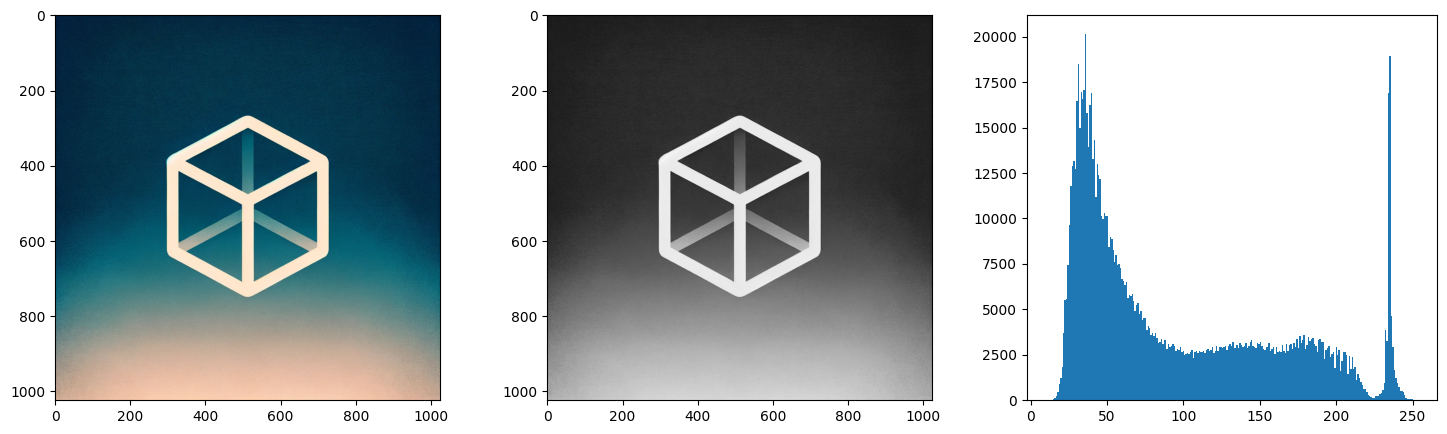

In [311]:
# zadanie 4.1-4.2
im2 = Image.open('lab4_4.png')
im_arr2 = np.asarray(im2)
grayscale = 0.21 * im_arr2[:, :, 0] + 0.72 * im_arr2[:, :, 1] + 0.07 * im_arr2[:, :, 2]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
ax1.imshow(im2)
ax2.imshow(Image.fromarray(grayscale))
ax3.hist(grayscale.ravel(), bins=256)
plt.show()

In [312]:
# zadanie 4.3 -  okreslenie punktu progowania na podstawie minimum lokalnego
hist, bin_edges = np.histogram(grayscale.ravel(), bins='auto')
inverted_hist = -hist # odwrocenie histogram do znajdowania minimów zamiast maksimów
peaks, _ = scipy.signal.find_peaks(inverted_hist)
minima_thresholds = bin_edges[peaks]
# threshold = minima_thresholds[0]
threshold = np.mean(minima_thresholds)
# zadanie 4.4
binary1 = (grayscale > threshold).astype('uint8') * 255
Image.fromarray(binary1).save('binary1.png')
# okreslenie puntku progowania za pomoca metody otsu
threshold = filters.threshold_otsu(grayscale)
binary2 = (grayscale > threshold).astype(np.uint8) * 255
Image.fromarray(binary2).save('binary2.png')
# okreslenie punktu progowania na podstawie mediany
median_value = np.median(grayscale)
median_bin = np.digitize(median_value, bin_edges) - 1
threshold = bin_edges[median_bin]
binary3 = (grayscale > threshold).astype(np.uint8) * 255
Image.fromarray(binary3).save('binary3.png')

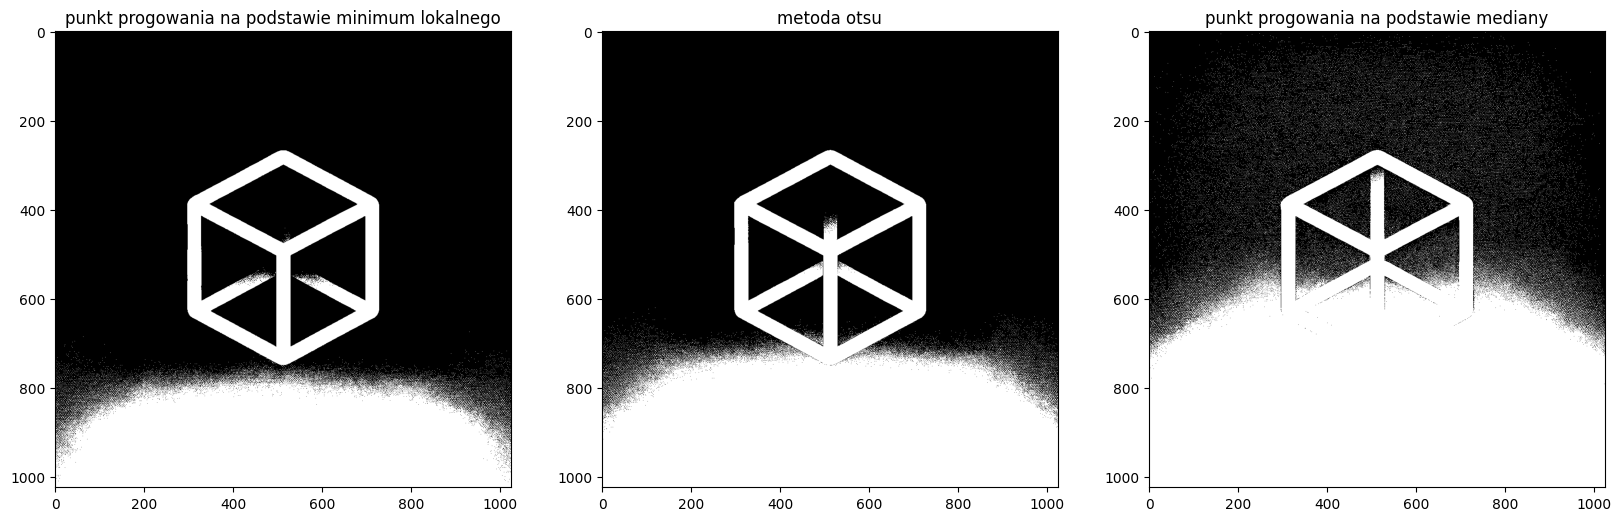

In [313]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 20))
ax1.imshow(binary1, cmap='gray')
ax1.set_title('punkt progowania na podstawie minimum lokalnego')
ax2.imshow(binary2, cmap='gray')
ax2.set_title('metoda otsu')
ax3.imshow(binary3, cmap='gray')
ax3.set_title('punkt progowania na podstawie mediany')
plt.show()

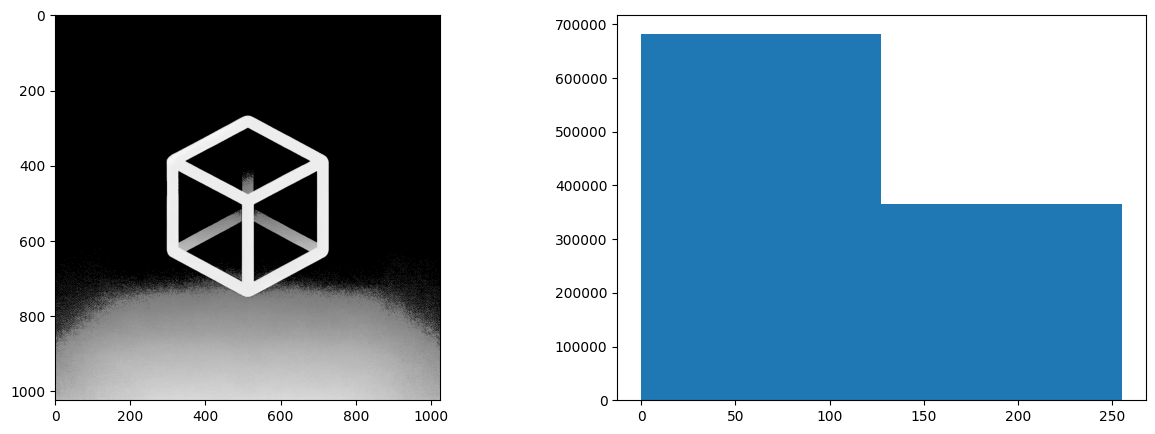

In [314]:
# zadanie 4.5 - segmentacja popzez maskowanie
threshold = filters.threshold_otsu(grayscale)
binary = (grayscale > threshold).astype(np.uint8) * 255
Image.fromarray(binary).save('binary2.png')
binary_mask = binary // 255
segmented = grayscale * binary_mask
segmented_img = Image.fromarray(segmented.astype('uint8'))
segmented_img.save('segmented_gradient.png')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.imshow(segmented_img, cmap='gray')
ax2.hist(binary.ravel(), bins=2)
plt.show()

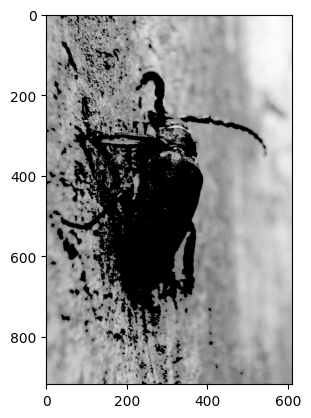

In [315]:
threshold = filters.threshold_otsu(luminance)
binary = (luminance > threshold).astype(np.uint8) * 255
binary_mask = binary // 255
segmented = luminance * binary_mask
segmented_img = Image.fromarray(segmented.astype('uint8'))
segmented_img.save('segmented_tanner.png')
plt.imshow(segmented_img, cmap='gray')
plt.show()